In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model
import seis_numerics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data(validation_only=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.36it/s]


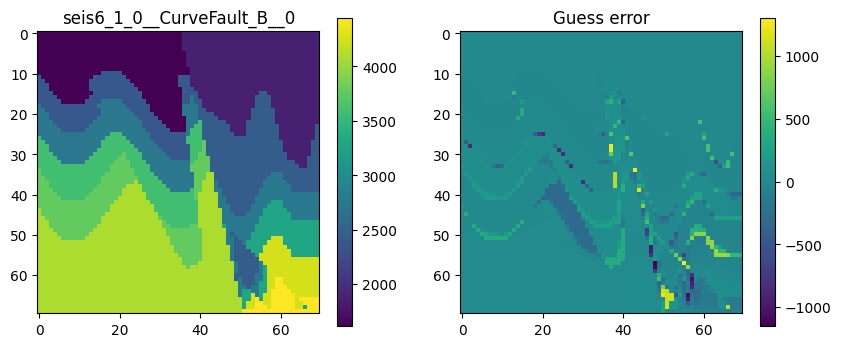

diag 3.250623900849397e-05
vel_to_seis time: 111.51
outside cost_and_gradient_func: 1756.69
total iteration time: 1873.20

vel_to_seis time: 109.51
outside cost_and_gradient_func: 2.00
total iteration time: 115.51

vel_to_seis time: 109.52
outside cost_and_gradient_func: 2.00
total iteration time: 115.52

vel_to_seis time: 105.24
outside cost_and_gradient_func: 1.00
total iteration time: 110.24

vel_to_seis time: 107.51
outside cost_and_gradient_func: 2.00
total iteration time: 116.51

2 63032111.06051617
vel_to_seis time: 105.51
outside cost_and_gradient_func: 3.00
total iteration time: 112.51

2 30287496.83078221
vel_to_seis time: 106.51
outside cost_and_gradient_func: 3.51
total iteration time: 114.02

2 39163274.4072934
vel_to_seis time: 108.51
outside cost_and_gradient_func: 3.00
total iteration time: 115.51

2 28045221.142270774
vel_to_seis time: 110.55
outside cost_and_gradient_func: 7.00
total iteration time: 122.55

2 23695390.807898782
vel_to_seis time: 109.51
outside cost_an

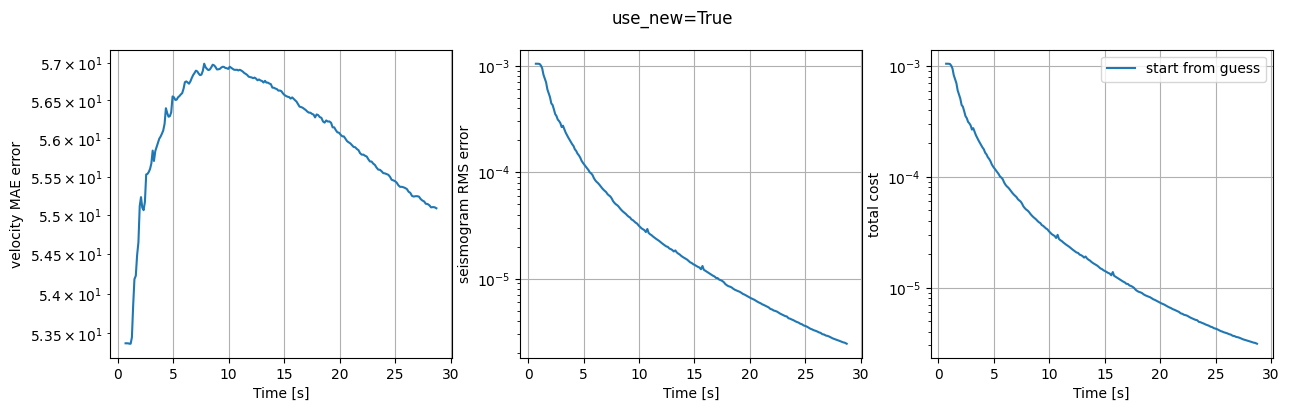

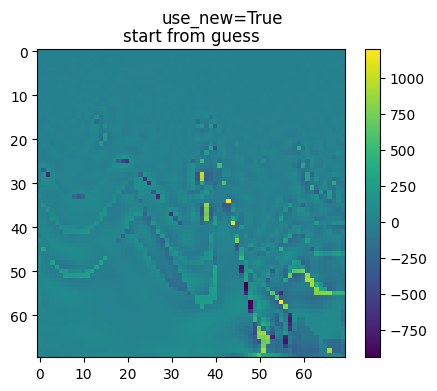

diag 3.250623900849397e-05
vel_to_seis time: 108.51
outside cost_and_gradient_func: 1467.11
total iteration time: 1580.62

vel_to_seis time: 105.51
outside cost_and_gradient_func: 1.00
total iteration time: 109.51

vel_to_seis time: 109.51
outside cost_and_gradient_func: 1.00
total iteration time: 114.51

vel_to_seis time: 108.30
outside cost_and_gradient_func: 1.00
total iteration time: 112.30

vel_to_seis time: 111.51
outside cost_and_gradient_func: 1.00
total iteration time: 116.51

vel_to_seis time: 108.51
outside cost_and_gradient_func: 1.00
total iteration time: 113.51

vel_to_seis time: 107.01
outside cost_and_gradient_func: 2.00
total iteration time: 114.01

vel_to_seis time: 108.51
outside cost_and_gradient_func: 1.00
total iteration time: 113.51

vel_to_seis time: 107.51
outside cost_and_gradient_func: 1.00
total iteration time: 113.51

vel_to_seis time: 106.51
outside cost_and_gradient_func: 1.00
total iteration time: 111.51

vel_to_seis time: 105.51
outside cost_and_gradien

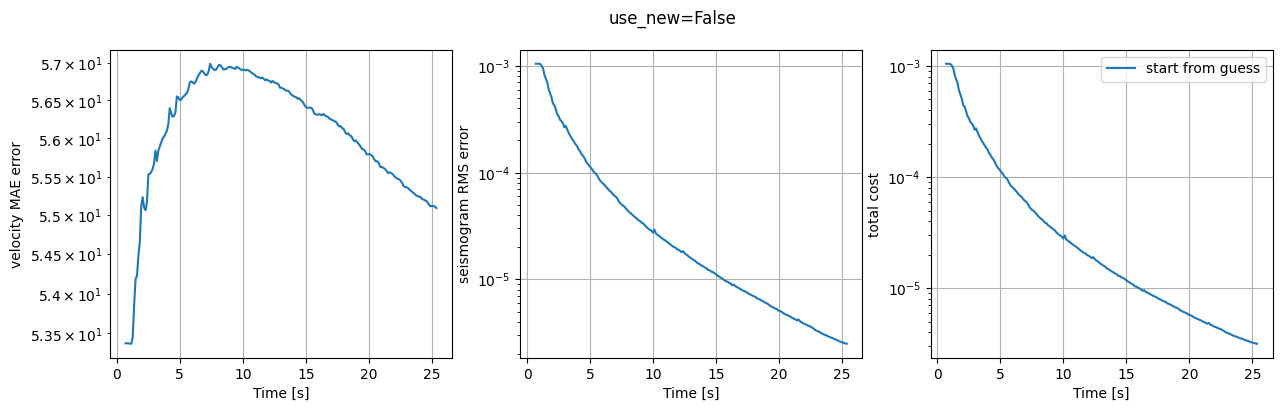

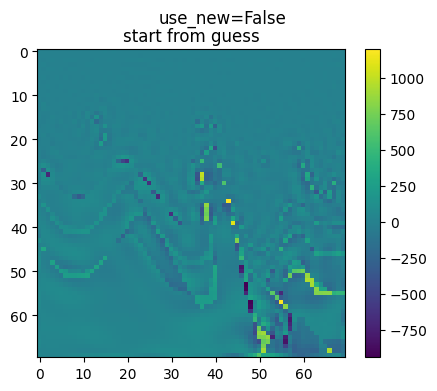

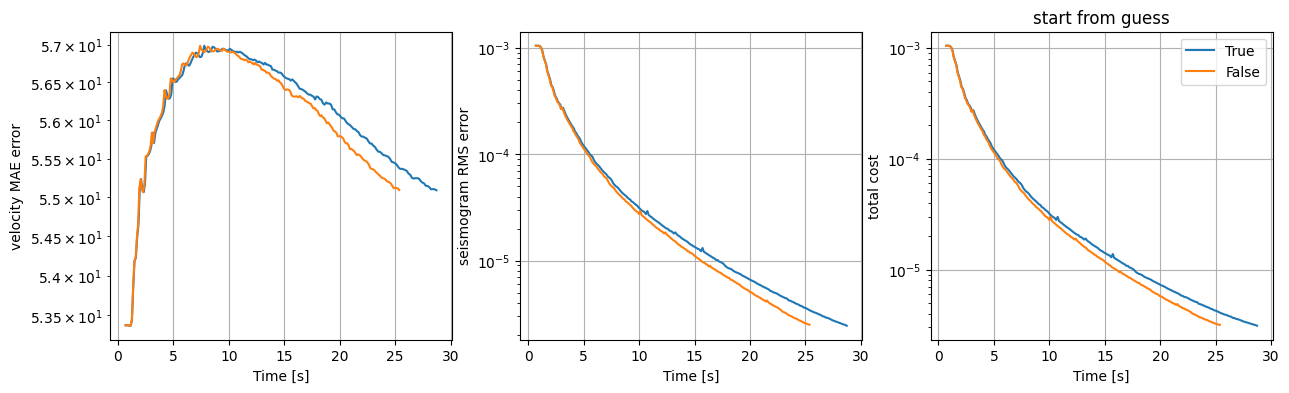

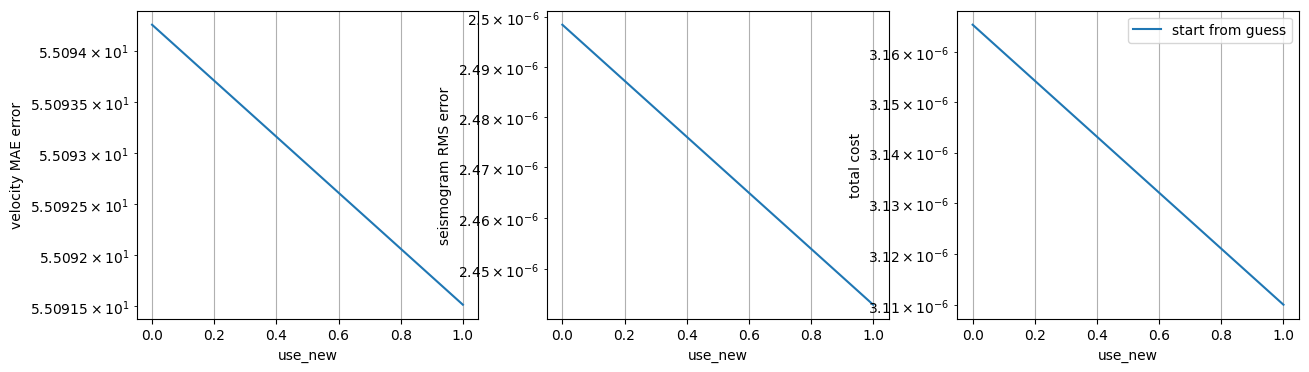

In [39]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
importlib.reload(seis_numerics)
kgs.profiling=True
seis_invert.profiling=True
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_model.model_TV2D()
model.show_convergence = True
model.iter_list = [200]

do_which_list = [False,False,True]

def param_func(model,value):    
    model.use_new_bfgs=value
    return model
    
param_values = [True,False]
param_name = "use_new"


for d in data[500:501]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)

In [26]:
import inspect
import torch.optim

# for a module
print(inspect.getsource(torch.optim.LBFGS))

class LBFGS(Optimizer):
    """Implements L-BFGS algorithm.

    Heavily inspired by `minFunc
    <https://www.cs.ubc.ca/~schmidtm/Software/minFunc.html>`_.

    .. warning::
        This optimizer doesn't support per-parameter options and parameter
        groups (there can be only one).

    .. warning::
        Right now all parameters have to be on a single device. This will be
        improved in the future.

    .. note::
        This is a very memory intensive optimizer (it requires additional
        ``param_bytes * (history_size + 1)`` bytes). If it doesn't fit in memory
        try reducing the history size, or use a different algorithm.

    Args:
        params (iterable): iterable of parameters to optimize. Parameters must be real.
        lr (float): learning rate (default: 1)
        max_iter (int): maximal number of iterations per optimization step
            (default: 20)
        max_eval (int): maximal number of function evaluations per optimization
            step 